<a href="https://colab.research.google.com/github/sarvanios6/foodhub-py/blob/main/IP_Project_Question_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

## **Context :**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

## **Objective :**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

## **Key Questions :**

1. What are the key patterns and trends in the dataset?
2. How do different variables (e.g., price, calories, customer ratings) impact food orders?
3. What recommendations can be made to improve food sales and customer experience?



### Data Dictionary

The data contains the different data related to a food order. The detailed data dictionary is given below.
Data Dictionary:

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Price paid per order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries

In [76]:
# Installing the libraries with the specified version.
!pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn -q --user

In [77]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# display plots directly inside the notebook instead of opening separate window
%matplotlib inline
# Advanced statistical visualizations
import seaborn as sns
# For statistical analysis
import scipy.stats as stats


### Loading the dataset

In [78]:
# Import the necessary module for uploading files in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Foodhub/foodhub_order.csv')

In [80]:
# Create a copy of the original dataset to avoid modifying the original data
df = data.copy()
# Display the first 5 rows of the copied dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [81]:
# Display the last 5 rows of the copied dataset
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [82]:
# Checking the number of rows and columns in the data
df.shape

(1898, 9)

#### Observations: - *The dataset has 1,898 rows and 9 columns*


### **Question 1:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]




In [83]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The dataset contains 9 columns with a mix of numerical and categorical data.
* Column types:

Integer (int64): order_id, customer_id, food_preparation_time, delivery_time (4 columns).
Float (float64): cost_of_the_order (1 column).
Object (string): restaurant_name, cuisine_type, day_of_the_week, rating (4 columns).
* There are no missing values (1898 non-null in all columns).
* The rating column is stored as object type instead of numeric, which may need conversion for analysis.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [84]:
# Check for missing values in each column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No missing values are present in the dataset.
* Since every column has 0 missing values, no additional data cleaning is required for handling missing values.
* The dataset is complete and ready for further analysis without requiring imputation or removal of rows/columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [85]:
# Get the minimum, mean (average), and maximum time taken for food preparation
df["food_preparation_time"].describe()[["min", "mean", "max"]]

,food_preparation_time
min,20.00000
mean,27.37197
max,35.00000


#### Observations:
* The minimum food preparation time is 20 minutes, meaning no dish in the dataset takes less than 20 minutes to prepare.
* The average (mean) food preparation time is 27.37 minutes, which represents the typical time required for food to be prepared.
* The maximum food preparation time is 35 minutes, meaning the longest time taken for any order in the dataset is 35 minutes.
* The food preparation times fall within a reasonable range (20 to 35 minutes), suggesting there are no extreme outliers.

### **Question 5:** How many orders are not rated? [1 mark]




In [86]:
# Write the code here
(df["rating"] == "Not given").sum()

736

#### Observations:
* A total of 736 orders (out of 1898 total orders) were not rated by customers.
* This means that 38.8% ((736 / 1898) * 100) of the orders lack rating feedback, which could impact data analysis on customer satisfaction.
* The absence of ratings could be due to:

Customers choosing not to leave feedback.
System errors where ratings were not recorded.
Orders that were canceled before rating.
* Since this is a categorical variable, we need to decide whether to:
Replace "Not given" with NaN for better processing.
Assign a default rating (e.g., the average of existing ratings).
Analyze whether certain restaurant types or cuisines have more missing ratings.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

**Since rating is a categorical variable, we can analyze its distribution.**





In [87]:
# Check the Unique Rating Values and Their Counts
# Count unique values in the 'rating' column
df["rating"].value_counts()



,count
rating,
Not given,736
5,588
4,386
3,188


Helps us see the distribution of different ratings.
Shows how common "Not given" is compared to actual ratings.


**Visualizing the Rating Distribution**

<ipython-input-88-3e8127a32798>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["rating"], order=df["rating"].value_counts().index, palette="coolwarm")


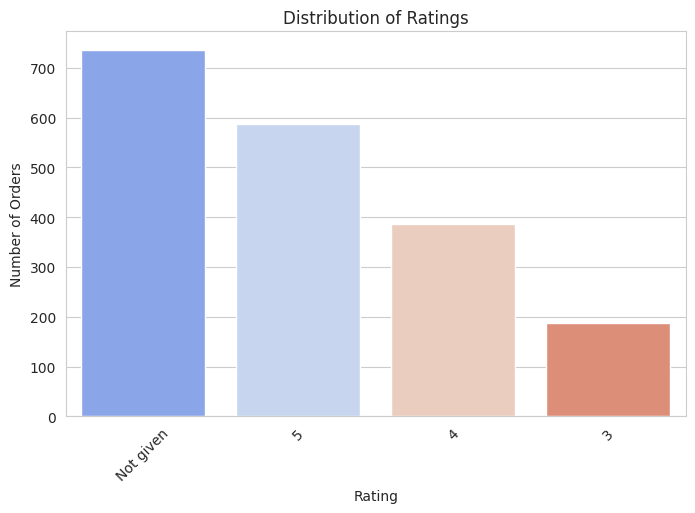

In [88]:
# Plot a count plot of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df["rating"], order=df["rating"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


### **Question 6:** Explore all the variables and provide observations on their

1.   List item

> Add blockquote


2.   List item

distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

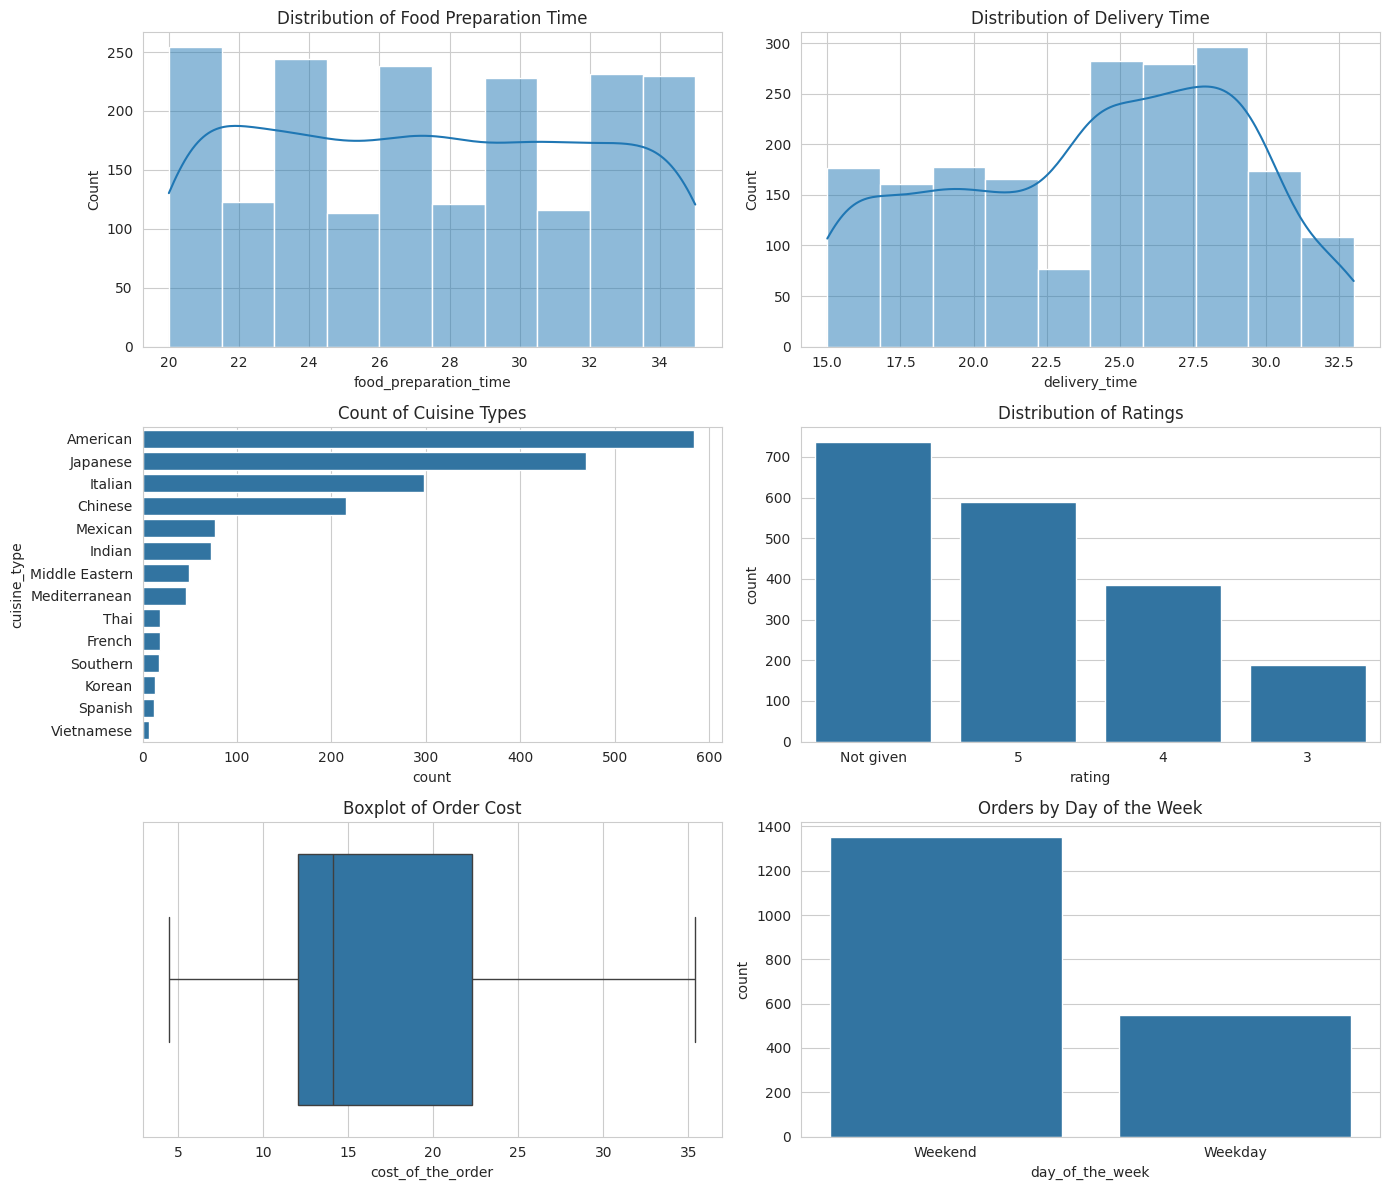

In [89]:
# Write the code here
# Set style for better visualization
sns.set_style("whitegrid")

# Define figure size
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# 1. Distribution of Food Preparation Time
sns.histplot(df["food_preparation_time"], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Food Preparation Time")

# 2. Distribution of Delivery Time
sns.histplot(df["delivery_time"], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Delivery Time")

# 3. Countplot of Cuisine Types
sns.countplot(y=df["cuisine_type"], order=df["cuisine_type"].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title("Count of Cuisine Types")

# 4. Countplot of Ratings (Including 'Not Given')
sns.countplot(x=df["rating"], order=df["rating"].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Ratings")

# 5. Distribution of Cost of the Order
sns.boxplot(x=df["cost_of_the_order"], ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of Order Cost")

# 6. Countplot of Orders by Day of the Week
sns.countplot(x=df["day_of_the_week"], order=df["day_of_the_week"].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title("Orders by Day of the Week")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [90]:
# Write the code here
df["restaurant_name"].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [91]:
# Write the code here
# Filter data for weekends
weekend_orders = df[df["day_of_the_week"] == "Weekend"]

# Get the most popular cuisine type on weekends
weekend_orders["cuisine_type"].value_counts().idxmax()


'American'

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [92]:
# Write the code here
# Calculate the percentage of orders costing more than $20
total_orders = len(df)
orders_above_20 = (df["cost_of_the_order"] > 20).sum()
(orders_above_20 / total_orders) * 100

29.24130663856691

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [93]:
# Write the code here
# Calculate the mean order delivery time
df["delivery_time"].mean()

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [94]:
# Write the code here
# Get the top 3 most frequent customers based on the number of orders placed
df["customer_id"].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


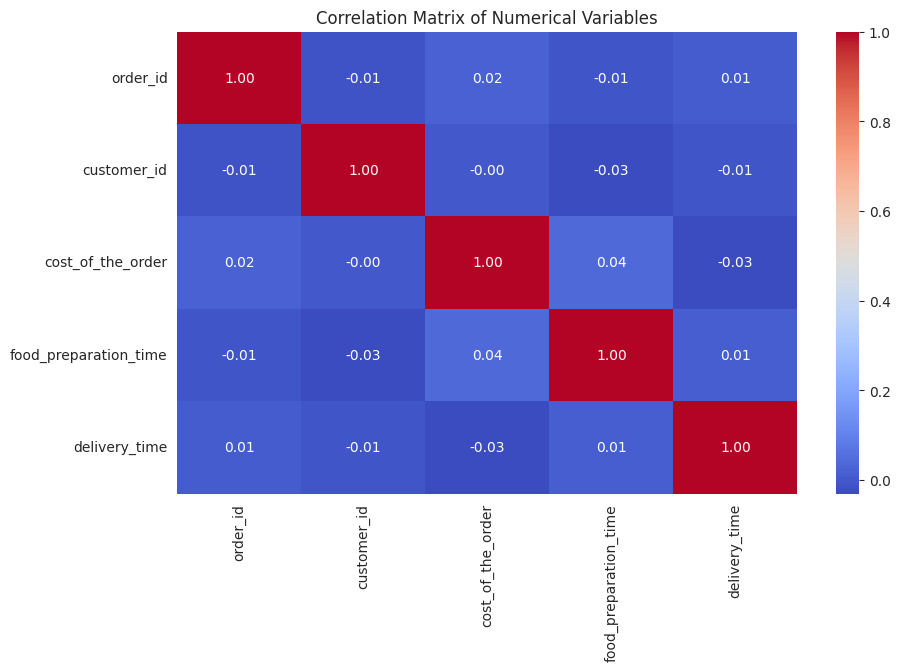

In [95]:
# Write the code here
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [96]:
# Write the code here
# Filter out orders with 'Not given' ratings
rated_orders = df[df['rating'] != 'Not given'].copy()

# Convert ratings to numeric
rated_orders['rating'] = pd.to_numeric(rated_orders['rating'])

# Group by restaurant and calculate the number of ratings and average rating
restaurant_stats = rated_orders.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Apply the promotional criteria
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the eligible restaurants
eligible_restaurants_sorted = eligible_restaurants.sort_values(by='mean', ascending=False)
eligible_restaurants_sorted


,restaurant_name,count,mean
132,The Meatball Shop,84,4.511905
16,Blue Ribbon Fried Chicken,64,4.328125
117,Shake Shack,133,4.278195
17,Blue Ribbon Sushi,73,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [97]:
# Write the code here
# Define a function to calculate commission based on order cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to calculate commission for each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate the total net revenue
total_net_revenue = df['commission'].sum()

total_net_revenue


6166.303

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [98]:
# Write the code here
# Calculate total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
orders_over_60_min = (df['total_delivery_time'] > 60).sum()
total_orders = len(df)
percentage_over_60_min = (orders_over_60_min / total_orders) * 100

percentage_over_60_min

10.537407797681771

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [99]:
# Write the code here
# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Create a new column classifying the day as 'Weekday' or 'Weekend'
df['day_type'] = df['day_of_the_week'].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

# Calculate mean delivery time for weekdays and weekends
mean_delivery_times = df.groupby('day_type')['delivery_time'].mean()

mean_delivery_times

,delivery_time
day_type,
Weekend,24.161749


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  